# Import

In [2]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [3]:
data = os.path.join('data', 'bank.csv')
bank_df = pd.read_csv(data)

# Methods/Globals/Constants

In [4]:
# Python Scripts
%run -i "Scripts/functions.py"

# Feature Extraction

In [5]:
feature_extraction_df = bank_df.copy()

In [6]:
feature_extraction_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
1,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
2,Fully Paid,234124.0,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
3,Fully Paid,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
4,Charged Off,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0


In [6]:
feature_extraction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [7]:
feature_extraction_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


# Interactions

Take the most highely correlated feature and create interactions between them.
    - Number of Credit Problems & Tax Liens
    - Number of Credit Problems & Bankruptcies
    - Monthly Debt & Current Credit Balance
    - Monthly Debt & Current Credit Balance

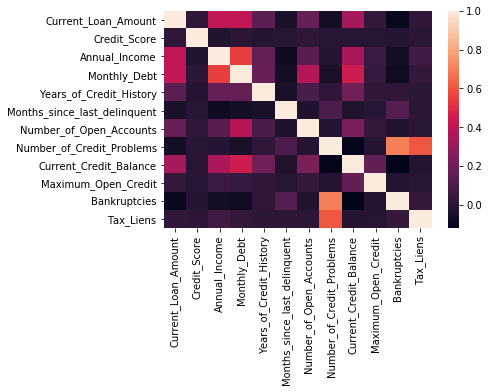

In [7]:
sns.heatmap(feature_extraction_df.corr());

In [8]:
feature_extraction_df['Number of Credit Problems [IN] Tax Liens'] = feature_extraction_df['Number_of_Credit_Problems'] * feature_extraction_df['Tax_Liens']
feature_extraction_df['Number of Credit Problems [IN] Bankruptcies'] = feature_extraction_df['Number_of_Credit_Problems'] * feature_extraction_df['Bankruptcies']

feature_extraction_df['Monthly Debt [IN] Current Credit Balance'] = feature_extraction_df['Monthly_Debt'] * feature_extraction_df['Current_Credit_Balance']
feature_extraction_df['Monthly Debt [IN] Current Credit Balance'] = feature_extraction_df['Monthly_Debt'] * feature_extraction_df['Number_of_Open_Accounts']

# Aggregations

Call aggregation methods on some of the catagorical features. get the mean, median, and count with the exception of customer id excluding median.
    - Waiting for EDA and clean datframe to work

In [10]:
"""
This code only
works for a cleaned dataframe
"""

feature_extraction_df = feature_extract_mean_count_median(df=feature_extraction_df, 
                                  columns=['Purpose', 'Home_Ownership', 'Term' ], 
                                  target='Credit_Score')

feature_extraction_df = feature_extract_mean_count_median(df=feature_extraction_df, 
                                  columns=['Customer_ID' ], 
                                  target='Credit_Score',
                                  return_trig=[True, True, False]) 

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [nan] of <class 'float'>

In [9]:
feature_extraction_df[feature_extraction_df.columns[4:]].head()

,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Number of Credit Problems [IN] Tax Liens,Number of Credit Problems [IN] Bankruptcies,Monthly Debt [IN] Current Credit Balance
0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0.0,1.0,141116.04
1,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0.0,0.0,74641.12
2,693234.0,10+ years,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0,0.0,1.0,142112.40
3,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0,0.0,0.0,264183.60
4,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0,0.0,0.0,38531.24


In [10]:
test = pd.DataFrame({
    'user_id': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 2],
    'order_id': [1,1,1,1,1,1,1,21,21,21,21,21,21,21,21,21,21, 3],
    'con' : [1,1,1,1,3939,111, 1,213,21,241,251,217,218,210,21,11,21, 1]
})